# HW3

Consider:
$$
(u_{xx}+u_{yy}) = 0~~for~~0\leq x,~ y\leq 2\pi
$$
With the following boundary condition
$$
\begin{align}
& u(0,y)=0\\
& u(2\pi,y)=0\\
& u(x,0)=\sin(2x)+\sin(5x)+\sin(7x)\\
& u(x,2\pi)=0
\end{align}
$$
For the general Laplacian problem (2D):
$$
\Delta u = f
$$
Its finite difference form:
$$
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{\Delta x^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{\Delta y^2} = f_{i,j}
$$
Jacobi iterative sheme:
$$
u_{i,j}^{n+1}=\frac{1}{4}[u_{i+1,j}^{n}+u_{i-1,j}^{n}+u_{i,j+1}^{n}+u_{i,j-1}^{n}-h^2f_{i,j}]
$$
Gauss-Seidel iterative scheme:
$$
u_{i,j}^{n+1}=\frac{1}{4}[u_{i+1,j}^{n}+u_{i-1,j}^{n+1}+u_{i,j+1}^{n}+u_{i,j-1}^{n+1}-h^2f_{i,j}]
$$


## Problem 1

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [85]:
dx = 2*np.pi/20
dy = 2*np.pi/20
x = np.arange(0, 2*np.pi+dx, dx)
y = np.arange(0, 2*np.pi+dy, dy)
x.max(), y.max()

(6.283185307179586, 6.283185307179586)

In [86]:
mesh1 = np.zeros((len(x), len(y)))
# B.C.
mesh1[0] = 0
mesh1[-1] = 0
mesh1[:,0] = np.sin(2*x)+np.sin(5*x)+np.sin(7*x)
mesh1[:,-1] = 0

mesh2 = mesh1.copy()
mesh3 = mesh1.copy()

In [87]:
def central_diff2(mesh, dx, dy):
    diff2_x = mesh[2:,1:-1] - 2*mesh[1:-1,1:-1] + mesh[:-2,1:-1]
    diff2_y = mesh[1:-1,2:] - 2*mesh[1:-1,1:-1] + mesh[1:-1,:-2]
    return np.linalg.norm(diff2_x / dx ** 2 + diff2_y / dy ** 2)

In [88]:
# Jacobi
max_iter = 200
li1 = []
for _ in range(max_iter):
    mesh1[1:-1,1:-1] = 0.25*(mesh1[:-2,1:-1]+mesh1[2:,1:-1]+mesh1[1:-1,:-2]+mesh1[1:-1,2:])
    li1.append(central_diff2(mesh1, dx, dy))
    
# Gauss-Seidel
li2 = []
for _ in range(max_iter):
    for i in range(1, len(x)-1):
        for j in range(1, len(y)-1):
            mesh2[i,j] = 0.25*(mesh2[i-1,j]+mesh2[i+1,j]+mesh2[i,j-1]+mesh2[i,j+1])
    li2.append(central_diff2(mesh2, dx, dy))

# SOR
omega = 1.5
li3 = []
for _ in range(max_iter):
    for i in range(1, len(x)-1):
        for j in range(1, len(y)-1):
            mesh3[i,j] = (1-omega)*mesh3[i,j]+omega*0.25*(mesh3[i-1,j]+mesh3[i+1,j]+mesh3[i,j-1]+mesh3[i,j+1])
    li3.append(central_diff2(mesh3, dx, dy))


Text(0, 0.5, 'Error')

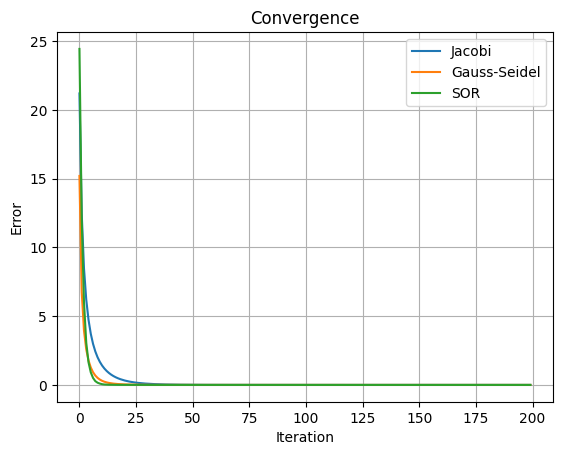

In [89]:
plt.plot(li1, label='Jacobi')
plt.plot(li2, label='Gauss-Seidel')
plt.plot(li3, label='SOR')  
plt.grid()
plt.legend()
plt.title('Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')

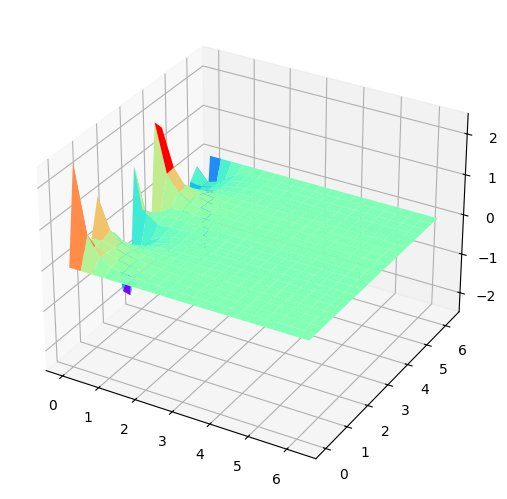

In [90]:
x = np.arange(0, 2*np.pi+dx, dx)
y = np.arange(0, 2*np.pi+dy, dy)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
# 创建3d图形的两种方式
# 将figure变为3d
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
# plt.imshow(mesh1)
ax.plot_surface(X, Y, mesh1, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

Text(0.5, 1.0, '2d SOR')

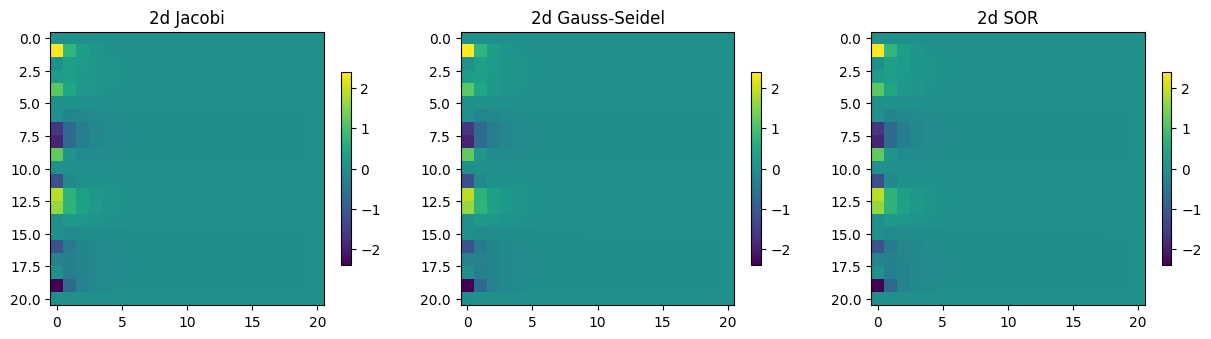

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(mesh1)
plt.colorbar(shrink=0.5)
plt.title("2d Jacobi")
plt.subplot(132)
plt.imshow(mesh2)
plt.colorbar(shrink=0.5)
plt.title("2d Gauss-Seidel")
plt.subplot(133)
plt.imshow(mesh3)
plt.colorbar(shrink=0.5)
plt.title("2d SOR")

In [92]:
# SOR jacobi
for _ in range(max_iter):
    mesh1[1:-1,1:-1] = 0.25*(mesh1[:-2,1:-1]+mesh1[2:,1:-1]+mesh1[1:-1,:-2]+mesh1[1:-1,2:])
    li1.append(central_diff2(mesh1, dx, dy))

## Problem 2

Combined with Point SOR, the previous update is seen as an intermediate result (Jacobi form as an example):
$$
\begin{align}
& \widetilde{u} = \frac{1}{4}[u_{i+1,j}^{n}+u_{i-1,j}^{n}+u_{i,j+1}^{n}+u_{i,j-1}^{n}-h^2f_{i,j}] \\
& u_{i,j}^{n+1} = (1-\omega)u_{i,j}^{n} + \omega\widetilde{u}
\end{align}
$$

In [93]:
omega = [0.5, 0.75, 1, 1.5]

# Jacobi
li1sor = [[] for _ in omega]
for i in range(len(omega)):
    mesh1 = np.zeros((len(x), len(y)))
    mesh1[0] = 0
    mesh1[-1] = 0
    mesh1[:,0] = np.sin(2*x)+np.sin(5*x)+np.sin(7*x)
    mesh1[:,-1] = 0
    for _ in range(max_iter):
        mesh1[1:-1,1:-1] = (1-omega[i])*mesh1[1:-1,1:-1]+omega[i]*0.25*(mesh1[:-2,1:-1]+mesh1[2:,1:-1]+mesh1[1:-1,:-2]+mesh1[1:-1,2:])
        li1sor[i].append(central_diff2(mesh1, dx, dy))

# G-S
li2sor = [[] for _ in omega]
for k in range(len(omega)):
    mesh2 = np.zeros((len(x), len(y)))
    mesh2[0] = 0
    mesh2[-1] = 0
    mesh2[:,0] = np.sin(2*x)+np.sin(5*x)+np.sin(7*x)
    mesh2[:,-1] = 0
    for _ in range(max_iter):
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                mesh2[i,j] = (1-omega[k])*mesh2[i,j]+omega[k]*0.25*(mesh2[i-1,j]+mesh2[i+1,j]+mesh2[i,j-1]+mesh2[i,j+1])
        li2sor[k].append(central_diff2(mesh2, dx, dy))

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
C:\Users\pepii\AppData\Local\Temp\ipykernel_37484\2368931928.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(li1sor[i], label='$\omega=%.1f$'%omega[i])
C:\Users\pepii\AppData\Local\Temp\ipykernel_37484\2368931928.py:17: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(li2sor[i], label='$\omega=%.1f$'%omega[i])


(0.0, 31.047971875826107)

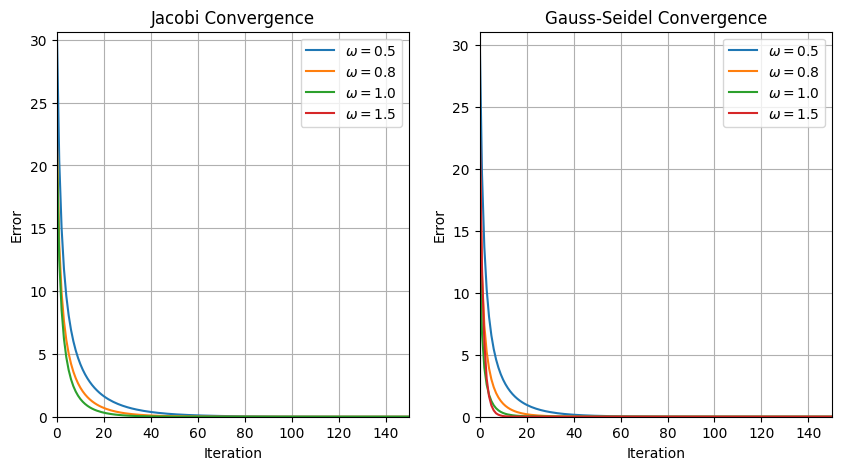

In [94]:
# plt.plot(li1, label='Jacobi')
# plt.plot(li1sor, label='Jacobi-SOR')
xmax = 150
plt.figure(figsize=(10,5))
plt.subplot(121)
for i in range(len(omega)):
    plt.plot(li1sor[i], label='$\omega=%.1f$'%omega[i])
plt.grid()
plt.legend()
plt.title('Jacobi Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.xlim(0, xmax)
plt.ylim(0, li1sor[0][0])
plt.subplot(122)
for i in range(len(omega)):
    plt.plot(li2sor[i], label='$\omega=%.1f$'%omega[i])
plt.grid()
plt.legend()
plt.title('Gauss-Seidel Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.xlim(0, xmax)
plt.ylim(0, li2sor[0][0])

While $\omega$ increases, both methods can see better error decrease. But in Jacobi, while $\omega > 1$, it cannot converge:

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
C:\Users\pepii\AppData\Local\Temp\ipykernel_37484\3459562641.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(li1sor[i], label='$\omega=%.1f$'%omega[i])
C:\Users\pepii\AppData\Local\Temp\ipykernel_37484\3459562641.py:13: SyntaxWarning: invalid escape sequence '\o'
  plt.title("2d Jacobi-Point SOR in $\omega=%.1f$"%omega[-1])
C:\Users\pepii\AppData\Local\Temp\ipykernel_37484\3459562641.py:17: SyntaxWarning: invalid escape sequence '\o'
  plt.title("2d Gauss-Seidel Point SOR in $\omega=%.1f$"%omega[-1])


Text(0.5, 1.0, '2d Gauss-Seidel Point SOR in $\\omega=1.5$')

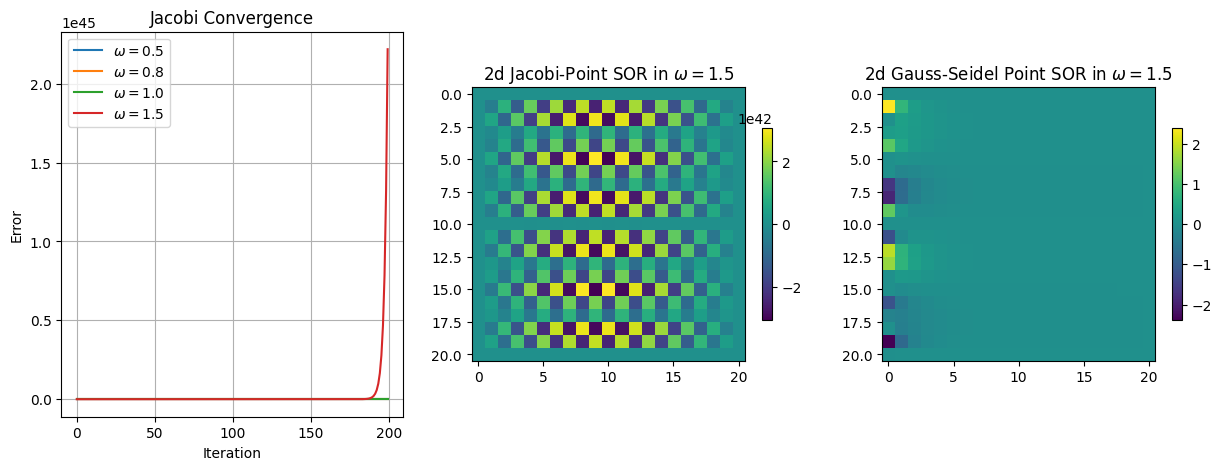

In [99]:
plt.figure(figsize=(15,5))
plt.subplot(131)
for i in range(len(omega)):
    plt.plot(li1sor[i], label='$\omega=%.1f$'%omega[i])
plt.grid()
plt.legend()
plt.title('Jacobi Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.subplot(132)
plt.imshow(mesh1)
plt.colorbar(shrink=0.5)
plt.title("2d Jacobi-Point SOR in $\omega=%.1f$"%omega[-1])
plt.subplot(133)
plt.imshow(mesh2)
plt.colorbar(shrink=0.5)
plt.title("2d Gauss-Seidel Point SOR in $\omega=%.1f$"%omega[-1])